# Uber Rider Data Case Study

##  Project Overview

Uber is interested in predicting rider retention. To help explore this question, they have provided a sample dataset of a cohort of users.

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone,churn,active
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,0,100.0,0,1,0,0,1,0,0,1
49996,0.00,4.0,4.9,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,0,0.0,1,0,0,0,1,0,1,0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,1,100.0,0,0,1,1,0,0,1,0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,0,100.0,1,0,0,0,1,0,1,0
49999,3.49,5.0,4.9,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,0,0.0,1,0,0,1,0,0,1,0


## Define features and target

In [4]:
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'

In [7]:
X = df[selected_features].values
y = df['churn'].values

In [8]:
X.shape

(50000, 14)

### Split data to train and test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, penalty='l2')
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [16]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred > threshold),
                    precision_score(y_train, y_train_pred > threshold),
                    recall_score(y_train, y_train_pred > threshold),
                    f1_score(y_train, y_train_pred > threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred > threshold),
                    precision_score(y_test, y_test_pred > threshold),
                    recall_score(y_test, y_test_pred > threshold),
                    f1_score(y_test, y_test_pred > threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [17]:
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


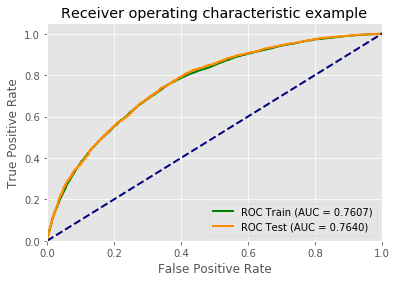

In [20]:
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Understand the estimated coefficients

In [21]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
8,city_Astapor,0.659806
11,phone_Android,0.443715
3,avg_surge,0.198335
1,avg_rating_by_driver,0.145792
10,city_Winterfell,0.135279
2,avg_rating_of_driver,0.132317
0,avg_dist,0.035349
7,weekday_pct,0.000191
4,surge_pct,-0.004126
13,phone_no_phone,-0.049709


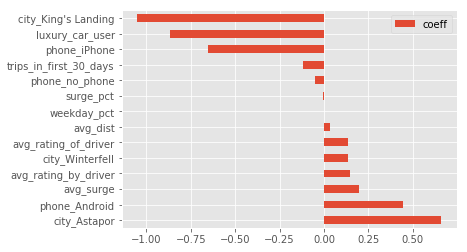

In [22]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Random Forest

In [26]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

              train      test
metrics                      
AUC        0.893662  0.856504
Accuracy   0.814400  0.787700
Precision  0.824547  0.802285
Recall     0.892243  0.876340
f1-score   0.857060  0.837679


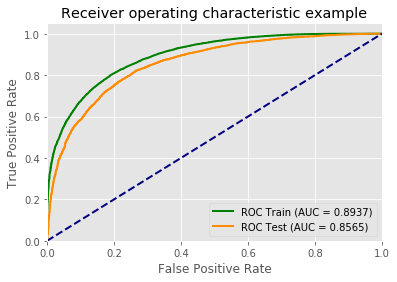

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
             # 'max_features': 'auto',
             # 'criterion': 'gini',
             # 'max_depth': 20,
             # 'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)
clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.873381  0.861511
Accuracy   0.802925  0.792700
Precision  0.821706  0.811234
Recall     0.873522  0.871061
f1-score   0.846822  0.840083


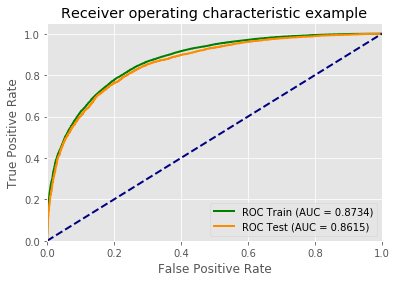

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

train_test_model(clf, X_train, y_train, X_test, y_test)